In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [92]:
kokkos_benchmark_file = "/mnt/d/Downloads/benchmark_results_kokkos.csv"
kokkos_data = pd.read_csv(kokkos_benchmark_file, sep=',', header=0)
kokkos_data.head()

,NumElements,LoadFactor,ThreadsPerBlock,NumBlocks,DefaultInsertTime,DefaultSearchTime
0,16384,0.2,32,8,14.04970,4.080450
1,16384,0.2,32,256,4.08386,0.281748
2,16384,0.2,128,8,7.37731,1.142080
3,16384,0.2,256,8,6.01263,0.660167
4,16384,0.2,512,8,4.55898,0.403566


In [93]:

for column in kokkos_data.columns:
    if "Time" in column:
        kokkos_data['Throughput_' + column] = 1000 * \
            kokkos_data['NumElements'] / kokkos_data[column]
            
kokkos_data.head()

,NumElements,LoadFactor,ThreadsPerBlock,NumBlocks,DefaultInsertTime,DefaultSearchTime,Throughput_DefaultInsertTime,Throughput_DefaultSearchTime
0,16384,0.2,32,8,14.04970,4.080450,1.166146e+06,4.015243e+06
1,16384,0.2,32,256,4.08386,0.281748,4.011891e+06,5.815126e+07
2,16384,0.2,128,8,7.37731,1.142080,2.220864e+06,1.434576e+07
3,16384,0.2,256,8,6.01263,0.660167,2.724931e+06,2.481796e+07
4,16384,0.2,512,8,4.55898,0.403566,3.593786e+06,4.059807e+07


In [94]:
N = 16777216
data_N = kokkos_data[kokkos_data['NumElements'] == N]

kokkos_grouped_data = data_N.groupby(['LoadFactor']).agg({
    'Throughput_DefaultSearchTime': 'max',
    'Throughput_DefaultInsertTime': 'max'
}).reset_index()

kokkos_grouped_data.head()

,LoadFactor,Throughput_DefaultSearchTime,Throughput_DefaultInsertTime
0,0.2,2.205480e+08,9.168178e+07
1,0.4,2.106939e+08,7.604611e+07
2,0.6,2.050055e+08,6.899207e+07
3,0.8,1.967988e+08,6.027295e+07
4,1.0,1.919680e+08,5.267737e+07


In [82]:
data = {}
cgs = [2,4,8,16]
for cg in cgs:
    benchmark_file = f'/mnt/d/Downloads/benchmark_results_cg{cg}.csv'
    data[cg]=pd.read_csv(benchmark_file, sep=',', header=0)
data[2].head()

,NumElements,LoadFactor,ThreadsPerBlock,NumBlocks,DefaultInsertTime,CGInsertTime,DefaultSearchTime,CGSearchTime,DefaultSearchSuccess,CGSearchSuccess,Tot Threads
0,16384,0.2,32,8,0.389248,1.088220,0.047104,0.081920,1,1,256
1,16384,0.2,32,256,0.221184,1.010690,0.014336,0.013312,1,1,8192
2,16384,0.2,128,8,0.397312,1.093540,0.021504,0.030720,1,1,1024
3,16384,0.2,256,8,0.312320,0.964608,0.019456,0.019680,1,1,2048
4,16384,0.2,512,8,0.290816,0.957216,0.017600,0.015648,1,1,4096


In [83]:
# Add a new column for throughput which is Time Column/ NumElements
for cg in cgs:
    for column in data[cg].columns:
        if "Time" in column:
            data[cg]['Throughput_' + column] = 1000*data[cg]['NumElements'] / data[cg][column]
        
data[cg].head()

,NumElements,LoadFactor,ThreadsPerBlock,NumBlocks,DefaultInsertTime,CGInsertTime,DefaultSearchTime,CGSearchTime,DefaultSearchSuccess,CGSearchSuccess,Throughput_DefaultInsertTime,Throughput_CGInsertTime,Throughput_DefaultSearchTime,Throughput_CGSearchTime
0,16384,0.2,32,8,0.362496,1.900350,0.053472,0.557888,1,1,4.519774e+07,8.621570e+06,3.064034e+08,2.936790e+07
1,16384,0.2,32,256,0.224448,0.923648,0.013312,0.029696,1,1,7.299686e+07,1.773836e+07,1.230769e+09,5.517241e+08
2,16384,0.2,128,8,0.590816,1.138590,0.021760,0.149248,1,1,2.773114e+07,1.438973e+07,7.529412e+08,1.097770e+08
3,16384,0.2,256,8,0.244736,1.126690,0.017504,0.079872,1,1,6.694561e+07,1.454171e+07,9.360146e+08,2.051282e+08
4,16384,0.2,512,8,0.206848,0.903424,0.015360,0.046944,1,1,7.920792e+07,1.813545e+07,1.066667e+09,3.490116e+08


In [84]:
cg=8
data_N = data[cg][data[cg]['NumElements'] == N]
data_N

,NumElements,LoadFactor,ThreadsPerBlock,NumBlocks,DefaultInsertTime,CGInsertTime,DefaultSearchTime,CGSearchTime,DefaultSearchSuccess,CGSearchSuccess,Throughput_DefaultInsertTime,Throughput_CGInsertTime,Throughput_DefaultSearchTime,Throughput_CGSearchTime
280,67108864,0.2,32,2048,47.1327,51.5943,23.3359,31.0455,1,1,1.423828e+09,1.300703e+09,2.875778e+09,2.161629e+09
281,67108864,0.2,32,8192,47.8771,50.3675,23.5039,30.0616,1,1,1.401690e+09,1.332384e+09,2.855222e+09,2.232378e+09
282,67108864,0.2,32,16384,48.1137,50.3357,23.5816,28.8287,1,1,1.394797e+09,1.333226e+09,2.845815e+09,2.327849e+09
283,67108864,0.2,32,65536,48.0195,49.7326,23.4906,28.5768,1,1,1.397534e+09,1.349394e+09,2.856839e+09,2.348369e+09
284,67108864,0.2,128,256,52.1924,49.4735,26.3873,27.1790,1,1,1.285798e+09,1.356461e+09,2.543226e+09,2.469144e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,67108864,1.0,1024,256,62.0513,61.7277,45.3315,56.1094,1,1,1.081506e+09,1.087176e+09,1.480402e+09,1.196036e+09
396,67108864,1.0,1024,2048,61.1709,51.6812,33.6159,56.0241,1,1,1.097072e+09,1.298516e+09,1.996343e+09,1.197857e+09
397,67108864,1.0,1024,8192,132.8020,111.4250,59.0531,54.7570,1,1,5.053302e+08,6.022783e+08,1.136416e+09,1.225576e+09
398,67108864,1.0,1024,16384,131.2150,49.5620,28.8369,52.7512,1,1,5.114420e+08,1.354039e+09,2.327187e+09,1.272177e+09


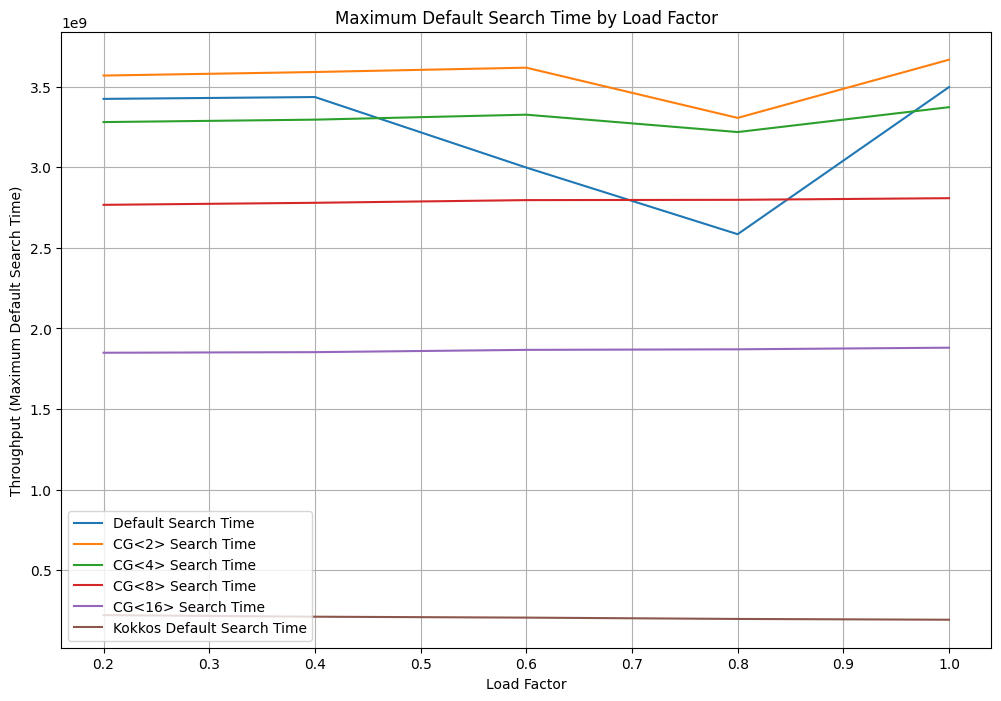

In [95]:
# Plot the graphs
# x-axis - LoadFactor
# y-axis - Throughput_DefaultSearchTime
# In the same graph, plot the throughput different NumElements. Pick the maximum Throughput_DefaultSearchTime for each LoadFactor

# Filter rows to pick a particular N
N = 16777216
plt.figure(figsize=(12, 8))

for cg in cgs:
    data_N = data[cg][data[cg]['NumElements'] == N]

    grouped_data = data_N.groupby(['LoadFactor']).agg({
        'Throughput_DefaultSearchTime': 'max',
        'Throughput_CGSearchTime': 'max'
    }).reset_index()

    if cg==2:
        plt.plot(grouped_data['LoadFactor'], grouped_data['Throughput_DefaultSearchTime'], label='Default Search Time')
    plt.plot(grouped_data['LoadFactor'], grouped_data['Throughput_CGSearchTime'], label=f'CG<{cg}> Search Time')


data_N = kokkos_data[kokkos_data['NumElements'] == N]

kokkos_grouped_data = data_N.groupby(['LoadFactor']).agg({
    'Throughput_DefaultSearchTime': 'max',
    'Throughput_DefaultInsertTime': 'max'
}).reset_index()

plt.plot(kokkos_grouped_data['LoadFactor'], kokkos_grouped_data['Throughput_DefaultSearchTime'], label='Kokkos Default Search Time')

plt.title('Maximum Default Search Time by Load Factor')
plt.xlabel('Load Factor')
plt.ylabel('Throughput (Maximum Default Search Time)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [86]:
# Plot the graphs
# x-axis - LoadFactor
# y-axis - Throughput_DefaultSearchTime
# In the same graph, plot the throughput different NumElements. Pick the maximum Throughput_DefaultSearchTime for each LoadFactor

# Filter rows to pick a particular N
N = 16777216
plt.figure(figsize=(12, 8))

for cg in cgs:
    data_N = data[cg][data[cg]['NumElements'] == N]

    grouped_data = data_N.groupby(['LoadFactor']).agg({
        'Throughput_DefaultSearchTime': 'max',
        'Throughput_CGSearchTime': 'max'
    }).reset_index()

    if cg == 2:
        plt.plot(grouped_data['LoadFactor'],
                 grouped_data['Throughput_DefaultSearchTime'], label='Default Search Time')
    plt.plot(grouped_data['LoadFactor'],
             grouped_data['Throughput_CGSearchTime'], label=f'CG<{cg}> Search Time')


plt.plot(kokkos_grouped_data['LoadFactor'],
         kokkos_grouped_data['Throughput_DefaultSearchTime'], label='Kokkos Default Search Time')
plt.title('Maximum Default Search Time by Load Factor')
plt.xlabel('Load Factor')
plt.ylabel('Throughput (Maximum Default Search Time)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

,LoadFactor,Throughput_DefaultSearchTime,Throughput_CGSearchTime
0,0.2,2.932541e+09,1.836310e+09
1,0.4,2.926888e+09,1.831704e+09
2,0.6,2.663526e+09,1.833851e+09
3,0.8,2.965168e+09,1.845668e+09
4,1.0,2.922198e+09,1.836888e+09


In [87]:
pivot_data

NumElements,17016422.4
LoadFactor,
0.2,3.025357e+09
0.4,3.618672e+09
0.6,3.602741e+09
0.8,3.486318e+09
1.0,4.120216e+09
